## The Single Layer Perceptron

The perceptron operates as a binary classifier using a threshold function. Here’s a step-by-step breakdown:

1. **Input Vector and Weight Vector**

   The perceptron starts with an input vector \(\mathbf{x}\) and a weight vector \(\mathbf{w}\). The weights represent the importance of each component of the input vector. The weighted sum is calculated as follows:

   \[
   z = \mathbf{w} \cdot \mathbf{x} + b
   \]

   where \(b\) is the bias term, which adjusts the decision boundary.

2. **Weighted Sum**

   The weighted sum \(z\) is computed as the dot product of \(\mathbf{x}\) and \(\mathbf{w}\), plus the bias \(b\):

   \[
   z = \sum_{i=1}^{n} w_i x_i + b
   \]

   The result \(z\) is a scalar that represents the combined input.

3. **Threshold Function**

   The scalar output \(z\) is then passed through a threshold function to produce a binary output. The threshold function used here is the Heaviside step function. The function is defined as:

   \[
   f(z) =
   \begin{cases}
   1 & \text{if } z \geq 0 \\
   0 & \text{if } z < 0
   \end{cases}
   \]

   This function acts as a decision boundary, firing if \(z\) is above the threshold and not firing otherwise. It’s analogous to how our brain’s neurons work: if the input surpasses a certain threshold, the neuron fires.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Generate linearly separable data first- that's the only kind of data the perceptron works with
def generate_data(n_samples=100):
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    return X, y

In [10]:
# something to plot the decision boundary when we're done
def decision_boundary(X, y, model):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend(loc='best')
    plt.show()

In [11]:
# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def predict(self, X):
        return np.where(self._net_input(X) >= 0.0, 1, 0)

    def _net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

In [12]:
# Generate data
X, y = generate_data()

In [13]:
# Initialize and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iter=10)
perceptron.fit(X, y)

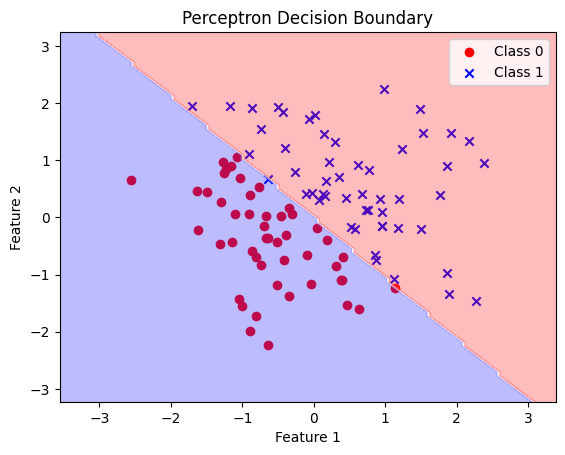

In [14]:
decision_boundary(X, y, perceptron)

In [16]:
print(f"Training errors in each epoch: {perceptron.errors_}")

Training errors in each epoch: [11, 5, 5, 5, 4, 2, 4, 0, 0, 0]
